In [ ]:
#Mounting Google Drive. A dataset is stored there.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Print working directory
!pwd

/content


In [ ]:
#Path to our dataset
path = "drive/MyDrive/spam.csv"

In [ ]:
#Importing necessary modules/libraries/packages
import string
import chardet
import pandas as pd
pd.set_option("display.max_colwidth", 100)
import numpy as np
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import re

from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Finding the right encoding for our dataset
with open(path, "rb") as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7270322499829184, 'encoding': 'Windows-1252', 'language': ''}

### Machine learning is not about algorithms. Machine learning is a comprehensive approach to solving problems and individual algorithms are only one piece of the puzzle.

### Machine learning should not be haphazard and piecemeal. It should be systematic and organized

### Better data beats fancier algorithms & Garbage In = Garbage Out

### There are 5 core steps: 
 - Exploratory Analysis
 - Data Cleaning
 - Feature Engineering
 - Algorithm Selection
 - Model Training

# 1) Exploratory Analysis

### The purpose of exploratory analysis is to "get to know" the dataset. 
  - You'll gain valuable hints for Data Cleaning
  - You'll think of ideas for Feature Engineering
  - You'll get a "feel" for the dataset, which will help you communicate results and deliver greater impact

### Start with Basics:
  - How many observations do I have?
  - How many features?
  - What are the data types of my features? Are they numeric? Categorical?
  - Do I have a target variable?

You want to get a qualitative "feel" for the dataset:
  - Do the columns make sense?
  - Do the values in those columns make sense?
  - Are the values on the right scale?
  - Is missing data going to be a big problem based on a quick eyeball test?

#### Categorical features cannot be visualized through histograms. Instead, you can use bar plots. In particular, you'll want to look out for sparse classes, which are classes that have a very small number of observations. By the way, a "class" is simply a unique value for a categorical feature.
#### They tend to be problematic when building models:
  - In the best case, they don't influence the model much
  - In the worse case, they can cause the model to be overfit


#### At this point, you should start making notes about potential fixes you'd like to make. If something looks out of place, now's a good time to ask the client/key stakeholder, or to dig a bit deeper.

# 2) Data Cleaning

#### Once more: "Better Data > Fancier Algorithms"

#### Remove Unwanted observations (Duplicate observations and Irrelevant observations). If we have an imbalanced dataset, maybe it will be acceptable to have duplicates (up-sampling the minority class)

#### Fix Structural Errors (typos or inconsistent capitalization). Finally, check for mislabeled classes, i.e. separate classes that should really be the same.

#### Filter Unwanted Outliers - Outliers can cause problems with certain types of models. But remember: outliers are innocent until proven guilty.

#### Handle Missing Data

In [ ]:
#Loading/reading our corpus/corpus of documents/dataset
dataset = pd.read_csv("drive/MyDrive/spam.csv", encoding="Windows-1252") #It also works with the "latin-1" encoding

In [ ]:
#Each row is a document (in the v2 column)
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To ...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,NaN,NaN,NaN


In [ ]:
dataset.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to see if you get your .,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 th...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is eas...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
np.random.seed(69)

In [ ]:
rnd_idxs = np.random.randint(0, 5571, 10)

In [ ]:
dataset.iloc[rnd_idxs]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4041,ham,What time do u get out?,NaN,NaN,NaN
2667,ham,Why de. You looking good only:-)..,NaN,NaN,NaN
1626,ham,Dear how you. Are you ok?,NaN,NaN,NaN
439,ham,But i have to. I like to have love and arrange.,NaN,NaN,NaN
3633,ham,Its a big difference. &lt;#&gt; versus &lt;#&gt; every &lt;#&gt; hrs,NaN,NaN,NaN
4374,spam,Ur TONEXS subscription has been renewed and you have been charged å£4.50. You can choose 10 more...,NaN,NaN,NaN
1033,ham,"OH MR SHEFFIELD! You wanna play THAT game, okay. You're the boss and I'm the nanny. You give me ...",NaN,NaN,NaN
5304,ham,Pls ask macho how much is budget for bb bold 2 is cos i saw a new one for &lt;#&gt; dollars.,NaN,NaN,NaN
1830,ham,That's the way you should stay oh.,NaN,NaN,NaN
5472,ham,Well obviously not because all the people in my cool college life went home ;_;,NaN,NaN,NaN


In [ ]:
##Another option for sampling rows from a dataframe
#dataset.sample(10)

In [ ]:
dataset.shape

(5572, 5)

#### We have 5572 observations/examples/entities/instances/records/tuples/samples/rows (different names for the same thing) ,
#### and 5 columns (the first column is a target variable/dependent variable and the rest of them are features/covariats/attributes/columns/independent variables

#### For now, the first two columns make sense for this problem (and values in it as well). The last three columns have similar names and they are almost full of missing/NaN values

In [ ]:
#Number of non-null/non-missing values for each column. We'll probably drop the last three columns ("Unnamed: 2", "Unnamed: 3" and "Unnamed: 4")
dataset.shape[0] - dataset.isna().sum()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [ ]:
#Datatypes are alright/valid. A categorical variable is represented as an "object" datatype in a dataframe object
dataset.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
#Same (and even more) information as we got from the above three commands
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
index = dataset.index
condition = dataset["Unnamed: 2"].isna()
not_missing_indices = index[~condition]

not_missing_indices_list = not_missing_indices.tolist()

print(len(not_missing_indices_list))

50


#### Printing rows from the dataset/corpus where we have some values in "Unnamed: 2" column

In [ ]:
dataset.iloc[not_missing_indices_list[0], :]

v1                                                                                                           spam
v2            Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verif...
Unnamed: 2                                                                                            PO Box 5249
Unnamed: 3                                                                                   MK17 92H. 450Ppw 16"
Unnamed: 4                                                                                                    NaN
Name: 95, dtype: object

In [ ]:
dataset.iloc[not_missing_indices_list[1], :]

v1                                                                                     ham
v2                                                                     \Wen u miss someone
Unnamed: 2     the person is definitely special for u..... But if the person is so special
Unnamed: 3                                                                why to miss them
Unnamed: 4                                                   just Keep-in-touch\" gdeve.."
Name: 281, dtype: object

In [ ]:
dataset.iloc[not_missing_indices_list[2], :]

v1                                                                           ham
v2            \HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAROUND! HOWDY GORGEOUS
Unnamed: 2               HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\""
Unnamed: 3                                                                   NaN
Unnamed: 4                                                                   NaN
Name: 444, dtype: object

In [ ]:
dataset.iloc[not_missing_indices_list[-3], :]

v1                                                                                                            ham
v2            \HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA ALETTER THATMUM GOTMARRIED 4thNOV.BEHIND OURBACK...
Unnamed: 2                                                                                    DEVIOUSBITCH.ANYWAY
Unnamed: 3                                                                                         IåÕL CALL U\""
Unnamed: 4                                                                                                    NaN
Name: 5081, dtype: object

In [ ]:
dataset.iloc[not_missing_indices_list[-2], :]

v1                                                                                                            ham
v2            Storming msg: Wen u lift d phne, u say \HELLO\" Do u knw wt is d real meaning of HELLO?? . . . I...
Unnamed: 2                                                       bt not his girlfrnd... G o o d n i g h t . . .@"
Unnamed: 3                                                                                                    NaN
Unnamed: 4                                                                                                    NaN
Name: 5264, dtype: object

In [ ]:
dataset.iloc[not_missing_indices_list[-1], :]

v1                                                                                         ham
v2                                                                                         \ER
Unnamed: 2     ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD HehE ;> hows bout u shexy? Pete Xx\""
Unnamed: 3                                                                                 NaN
Unnamed: 4                                                                                 NaN
Name: 5268, dtype: object

### It is possible that these last three columns (or at least the first one out of these last three) are/is continuation/s of the first column "v2"

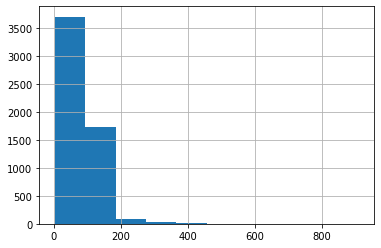

In [ ]:
dataset["v2"].apply(len).hist();

In [ ]:
##Same as the previous command
#dataset["v2"].str.len().hist();

In [ ]:
dataset["v2"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: v2, Length: 5572, dtype: int64

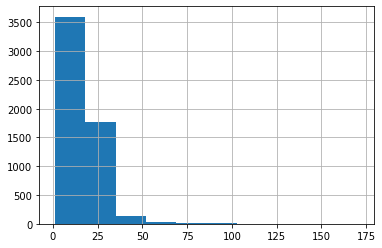

In [ ]:
dataset["v2"].apply(lambda x: len(x.split())).hist();

In [ ]:
dataset["v2"].apply(lambda x: len(x.split()))

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: v2, Length: 5572, dtype: int64

In [ ]:
dataset["v2"].apply(len).min(), dataset["v2"].apply(len).max()

(2, 910)

In [ ]:
dataset["v2"].apply(len).sort_values()[:30]

4496    2
5357    2
1924    2
3049    2
4012    3
5268    3
3490    3
260     3
2181    3
5471    3
1611    3
3374    3
3831    3
3899    4
286     4
5173    4
2687    4
2601    4
5188    4
2321    5
1699    5
1426    5
4857    5
2659    5
2508    5
3154    5
1272    5
1482    5
1318    5
4291    5
Name: v2, dtype: int64

In [ ]:
dataset["v2"].iloc[dataset["v2"].apply(len).sort_values()[:30].index]

4496       Ok
5357       Ok
1924       Ok
3049       Ok
4012      Ok.
5268      \ER
3490      Ok.
260       Yup
2181      Ok.
5471      Yup
1611      645
3374      :) 
3831      Ok.
3899     Okie
286      Ok..
5173     U 2.
2687     Okie
2601     Okie
5188     Okie
2321    Ok...
1699    Ok...
1426    Ok...
4857    Ok...
2659    Ok...
2508    Ok...
3154    Ok...
1272    Ok...
1482    Ok...
1318    Ok...
4291    G.W.R
Name: v2, dtype: object

### Some of these rows will be completely removed when we remove numbers, stop words, punctuations or some non-alphanumeric values from our corpus in data preprocessing/data cleaning step 

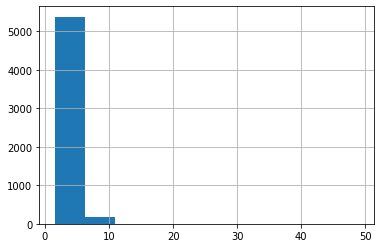

In [ ]:
# Average word/token length in each document
dataset["v2"].apply(lambda x: [len(word) for word in x.split()]).map(lambda x: np.mean(x)).hist();

In [ ]:
stop = set(stopwords.words("english"))

In [ ]:
splitted = dataset["v2"].str.split()

In [ ]:
splitted = splitted.values.tolist()

In [ ]:
all_tokens = [token for row in splitted for token in row]

In [ ]:
len(all_tokens)

86335

In [ ]:
stopwords_occurences = {}
non_stopwords_occurences = {}

In [ ]:
for token in all_tokens:
  if token in stop:
    if token in stopwords_occurences:
      stopwords_occurences[token] += 1
    else:
      stopwords_occurences[token] = 1
  else:
    if token in non_stopwords_occurences:
      non_stopwords_occurences[token] += 1
    else:
      non_stopwords_occurences[token] = 1

In [ ]:
stop_keys = sorted(stopwords_occurences, key=lambda x: stopwords_occurences[x], reverse=True)[:15]
stop_values = [stopwords_occurences[key] for key in stop_keys]

non_stop_keys = sorted(non_stopwords_occurences, key=lambda x: non_stopwords_occurences[x], reverse=True)[:10]
non_stop_values = [non_stopwords_occurences[key] for key in non_stop_keys]

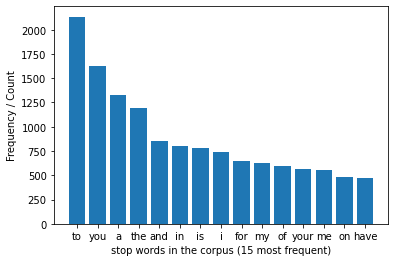

In [ ]:
plt.bar(stop_keys, stop_values);
plt.xlabel("stop words in the corpus (15 most frequent)");
plt.ylabel("Frequency / Count");

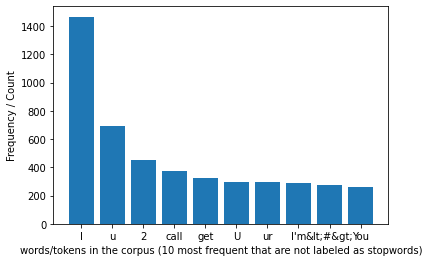

In [ ]:
plt.bar(non_stop_keys, non_stop_values);
plt.xlabel("words/tokens in the corpus (10 most frequent that are not labeled as stopwords)");
plt.ylabel("Frequency / Count");

In [ ]:
dataset["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
assert dataset["v1"].value_counts().sum() == dataset.shape[0]

In [ ]:
print(f'Percentage of observations that are classified as spam: {round(dataset["v1"].value_counts()[1] / dataset["v1"].value_counts().sum() * 100, 2)}%')

Percentage of observations that are classified as spam: 13.41%


#### The dataset is imbalanced (a little bit). There are some techniques for handling this problem:
  - Up-sample Minority Class
  - Down-sample Majority Class
  - Change Your Performance Metric (e.g. Area Under ROC Curve)
  - Penalize Algorithms (Cost-Sensitive Training; e.g. Penalized-SVM)
  - Use Tree-Based Algorithms (e.g. Random Forests or Gradient Boosted Trees)
  - Google Translation (googletrans python package) - specific for NLP problems
  - Create Synthetic Samples (Data Augmentation; e.g. SMOTE algorithm), Combine Minority Classes or Reframe as Anomaly Detection



In [ ]:
ham_len = dataset["v2"][dataset["v1"] == "ham"].apply(len)
spam_len = dataset["v2"][dataset["v1"] == "spam"].apply(len)

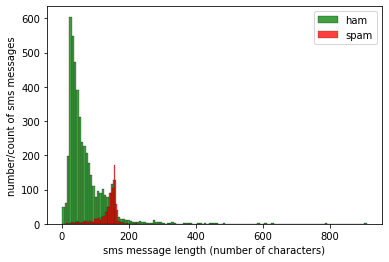

In [ ]:
sns.histplot(ham_len, color="green", label="ham")
sns.histplot(spam_len, color="red", label="spam")
plt.xlabel("sms message length (number of characters)")
plt.ylabel("number/count of sms messages")
plt.legend()
plt.plot();

In [ ]:
word_cloud_ham = " ".join([sms for class_, sms in dataset[["v1", "v2"]].values if class_ == "ham"])
word_cloud_spam = " ".join([sms for class_, sms in dataset[["v1", "v2"]].values if class_ == "spam"])

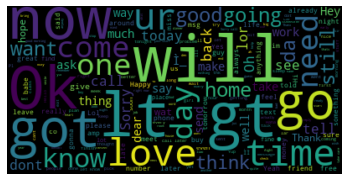

In [ ]:
#Most frequent words/tokens in documents that are classified as ham
wordcloud_ham = WordCloud().generate(word_cloud_ham)

plt.imshow(wordcloud_ham, interpolation="bilinear")
plt.axis("off")
plt.show()

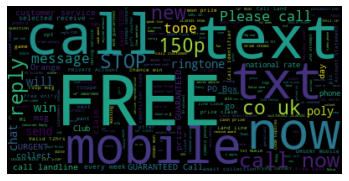

In [ ]:
#Most frequent words/tokens in documents that are classified as spam
wordcloud_spam = WordCloud().generate(word_cloud_spam)

plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stop = stopwords.words("english"); print("len:", len(stop), "\n"); stop[:20]

len: 179 



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
p1 = .2

In [ ]:
#Rule of thumb: If we have a number of examples in range from 10 to 10000 we can use 70/30% train-test split or 60/20/20% train-validation(development)-test split
train_ds, test_ds = train_test_split(dataset, test_size=p1, random_state=69, stratify=dataset["v1"])

In [ ]:
train_ds.shape, test_ds.shape 

((4457, 5), (1115, 5))

In [ ]:
type(train_ds), type(test_ds)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
#1)
#p1*5572 = p2*4457
#p2 = p1*5572/4457

#2)
#0.8*p2 = 0.2
#p2 = 0.2/0.8
#p2 = 0.25

In [ ]:
p2 = p1*dataset.shape[0]/train_ds.shape[0]
p2_ = .2 / .8
round(p2, 2), round(p2_, 2)

(0.25, 0.25)

In [ ]:
train_ds, valid_ds = train_test_split(train_ds, test_size=p2, random_state=69, stratify=train_ds["v1"])

In [ ]:
train_ds.shape, valid_ds.shape

((3342, 5), (1115, 5))

In [ ]:
type(train_ds), type(valid_ds)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
train_ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2803,ham,Lil fever:) now fine:),NaN,NaN,NaN
3366,ham,Hey what are you doing. Y no reply pa..,NaN,NaN,NaN
2511,ham,Er yep sure. Props?,NaN,NaN,NaN
1635,ham,"You have come into my life and brought the sun ..Shiny down on me, warming my heart. Putting a c...",NaN,NaN,NaN
4364,ham,Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.,NaN,NaN,NaN


In [ ]:
train_ds.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3266,ham,Ok then i come n pick u at engin?,NaN,NaN,NaN
775,ham,Thanks for picking up the trash.,NaN,NaN,NaN
4081,ham,No no. I will check all rooms befor activities,NaN,NaN,NaN
4852,ham,I'm fine. Hope you are also,NaN,NaN,NaN
2233,ham,Good Morning plz call me sir,NaN,NaN,NaN


In [ ]:
valid_ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1222,ham,Teach me apps da. When you come to college.,NaN,NaN,NaN
4259,ham,Are you plans with your family set in stone ?,NaN,NaN,NaN
1172,ham,Happy new years melody!,NaN,NaN,NaN
5005,ham,ILL B DOWN SOON,NaN,NaN,NaN
963,ham,Yo chad which gymnastics class do you wanna take? The site says Christians class is full..,NaN,NaN,NaN


In [ ]:
valid_ds.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3176,ham,In meeting da. I will call you,NaN,NaN,NaN
284,ham,"Yeah I think my usual guy's still passed out from last night, if you get ahold of anybody let me...",NaN,NaN,NaN
510,ham,"8 at the latest, g's still there if you can scrounge up some ammo and want to give the new ak a try",NaN,NaN,NaN
3551,ham,Lol u still feeling sick?,NaN,NaN,NaN
4955,ham,"Ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know any...",NaN,NaN,NaN


In [ ]:
test_ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1828,ham,May i call You later Pls,NaN,NaN,NaN
497,ham,Some of them told accenture is not confirm. Is it true.,NaN,NaN,NaN
902,ham,"I wonder if your phone battery went dead ? I had to tell you, I love you babe",NaN,NaN,NaN
4854,ham,Same to u...,NaN,NaN,NaN
4664,ham,Ok set let u noe e details later...,NaN,NaN,NaN


In [ ]:
test_ds.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3287,spam,Someone U know has asked our dating service 2 contact you! Cant Guess who? CALL 09058097189 NOW ...,NaN,NaN,NaN
4224,ham,\The world suffers a lot... Not because of the violence of bad people. But because of the silenc...,"Gud night....""",NaN,NaN
3935,ham,They r giving a second chance to rahul dengra.,NaN,NaN,NaN
5432,ham,Thanx a lot 4 ur help!,NaN,NaN,NaN
3543,ham,Lol ok ill try to send. Be warned Sprint is dead slow. You'll prolly get it tomorrow,NaN,NaN,NaN


In [ ]:
train_ds["v1"].value_counts()["spam"] / train_ds["v1"].value_counts().sum() * 100

13.405146618791141

In [ ]:
train_ds["v1"].value_counts()["ham"] / train_ds["v1"].value_counts().sum() * 100

86.59485338120886

In [ ]:
valid_ds["v1"].value_counts()["spam"] / valid_ds["v1"].value_counts().sum() * 100

13.452914798206278

In [ ]:
test_ds["v1"].value_counts()["ham"] / test_ds["v1"].value_counts().sum() * 100

86.63677130044843

In [ ]:
test_ds["v1"].value_counts()["spam"] / test_ds["v1"].value_counts().sum() * 100

13.363228699551568

In [ ]:
test_ds["v1"].value_counts()["ham"] / test_ds["v1"].value_counts().sum() * 100

86.63677130044843

In [ ]:
train_ds = train_ds.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [ ]:
train_ds.head()

,v1,v2
2803,ham,Lil fever:) now fine:)
3366,ham,Hey what are you doing. Y no reply pa..
2511,ham,Er yep sure. Props?
1635,ham,"You have come into my life and brought the sun ..Shiny down on me, warming my heart. Putting a c..."
4364,ham,Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.


In [ ]:
train_ds.tail()

,v1,v2
3266,ham,Ok then i come n pick u at engin?
775,ham,Thanks for picking up the trash.
4081,ham,No no. I will check all rooms befor activities
4852,ham,I'm fine. Hope you are also
2233,ham,Good Morning plz call me sir


In [ ]:
train_ds.shape

(3342, 2)

In [ ]:
train_ds.columns = ["class", "sms"]

In [ ]:
train_ds.head()

,class,sms
2803,ham,Lil fever:) now fine:)
3366,ham,Hey what are you doing. Y no reply pa..
2511,ham,Er yep sure. Props?
1635,ham,"You have come into my life and brought the sun ..Shiny down on me, warming my heart. Putting a c..."
4364,ham,Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.


In [ ]:
train_ds["class"].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
train_ds.replace(["ham", "spam"], [0, 1], inplace=True)
#The second option is: train_ds.class.map({"ham":0, "spam":1})

In [ ]:
train_ds.head()

,class,sms
2803,0,Lil fever:) now fine:)
3366,0,Hey what are you doing. Y no reply pa..
2511,0,Er yep sure. Props?
1635,0,"You have come into my life and brought the sun ..Shiny down on me, warming my heart. Putting a c..."
4364,0,Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.


In [ ]:
train_ds.tail()

,class,sms
3266,0,Ok then i come n pick u at engin?
775,0,Thanks for picking up the trash.
4081,0,No no. I will check all rooms befor activities
4852,0,I'm fine. Hope you are also
2233,0,Good Morning plz call me sir


In [ ]:
train_ds.reset_index(drop=True, inplace=True);

In [ ]:
train_ds.head()

,class,sms
0,0,Lil fever:) now fine:)
1,0,Hey what are you doing. Y no reply pa..
2,0,Er yep sure. Props?
3,0,"You have come into my life and brought the sun ..Shiny down on me, warming my heart. Putting a c..."
4,0,Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.


In [ ]:
train_ds.tail()

,class,sms
3337,0,Ok then i come n pick u at engin?
3338,0,Thanks for picking up the trash.
3339,0,No no. I will check all rooms befor activities
3340,0,I'm fine. Hope you are also
3341,0,Good Morning plz call me sir


In [ ]:
X_train = train_ds[["sms"]]
y_train = train_ds[["class"]]

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train.head()

,sms
0,Lil fever:) now fine:)
1,Hey what are you doing. Y no reply pa..
2,Er yep sure. Props?
3,"You have come into my life and brought the sun ..Shiny down on me, warming my heart. Putting a c..."
4,Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.


In [ ]:
y_train.head()

,class
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train.sample(20)

,sms
1960,Ringtone Club: Gr8 new polys direct to your mobile every week !
2029,\HEY KATE
2262,"Sir, I need Velusamy sir's date of birth and company bank facilities details."
2158,Yes..he is really great..bhaji told kallis best cricketer after sachin in world:).very tough to ...
3244,"The sign of maturity is not when we start saying big things.. But actually it is, when we start ..."
2258,Just send a text. We'll skype later.
2288,But i haf enuff space got like 4 mb...
396,Guess he wants alone time. We could just show up and watch when they do..
172,K:)eng rocking in ashes:)
2366,Ya:)going for restaurant..


In [ ]:
X_train_processed = X_train["sms"].apply(str.lower).to_frame()
X_train_processed

,sms
0,lil fever:) now fine:)
1,hey what are you doing. y no reply pa..
2,er yep sure. props?
3,"you have come into my life and brought the sun ..shiny down on me, warming my heart. putting a c..."
4,ujhhhhhhh computer shipped out with address to sandiago and parantella lane. wtf. poop.
...,...
3337,ok then i come n pick u at engin?
3338,thanks for picking up the trash.
3339,no no. i will check all rooms befor activities
3340,i'm fine. hope you are also


In [ ]:
custom_punctuations = '!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_some_punctuations(doc):
  for c in string.punctuation:
    doc = doc.replace(c, " ")
    doc = doc.replace("  ", " ")
  return doc

In [ ]:
X_train_processed = X_train_processed["sms"].apply(remove_some_punctuations).to_frame()
X_train_processed

,sms
0,lil fever now fine
1,hey what are you doing y no reply pa
2,er yep sure props
3,you have come into my life and brought the sun shiny down on me warming my heart putting a const...
4,ujhhhhhhh computer shipped out with address to sandiago and parantella lane wtf poop
...,...
3337,ok then i come n pick u at engin
3338,thanks for picking up the trash
3339,no no i will check all rooms befor activities
3340,i m fine hope you are also


In [ ]:
REPEATED = re.compile(r"([a-z])\1+")

In [ ]:
X_train_processed = X_train_processed["sms"].apply(lambda x: REPEATED.sub(r"\1", x)).to_frame()
X_train_processed

,sms
0,lil fever now fine
1,hey what are you doing y no reply pa
2,er yep sure props
3,you have come into my life and brought the sun shiny down on me warming my heart puting a consta...
4,ujh computer shiped out with adres to sandiago and parantela lane wtf pop
...,...
3337,ok then i come n pick u at engin
3338,thanks for picking up the trash
3339,no no i wil check al roms befor activities
3340,i m fine hope you are also


In [ ]:
first_lookup_dict = {"lil": "little", "y": "you", "props": "proper respect", "n": "and", "u": "you", 
                     "r": "are", "yep": "yes", "plz": "please", "pls": "please", "cause": "because",
                     "cos": "because", "gr8": "great", "2": "too", 
                     "haf": "have", "hav": "have", "enuff": "enough", "re": "are",
                     "4": "for", "m8": "mate", "k": "ok", "wat": "what", "tht": "that", "l8r": "later",
                     "thk": "think", "def": "definitely", "wan": "want", "ll": "will", "mins": "minutes",
                     "knw": "know", "nt": "not", "frnds": "friends", "ur": "your", "bcaz": "because",
                     "ya": "you", "den": "then", "thanx": "thanks", "tnx": "thanks", "sis": "sister",
                     "dis": "this", "lemme": "let me", "b4": "before", "gotta": "have got to", "wil": "will"}

In [ ]:
X_train_processed = X_train_processed["sms"].apply(lambda x: " ".join([first_lookup_dict[token] if token in first_lookup_dict else token for token in x.split()])).to_frame()
X_train_processed

,sms
0,little fever now fine
1,hey what are you doing you no reply pa
2,er yes sure proper respect
3,you have come into my life and brought the sun shiny down on me warming my heart puting a consta...
4,ujh computer shiped out with adres to sandiago and parantela lane wtf pop
...,...
3337,ok then i come and pick you at engin
3338,thanks for picking up the trash
3339,no no i will check al roms befor activities
3340,i m fine hope you are also


In [ ]:
second_lookup_dict = {"aint": "am not", "ain't": "am not", "m": "am", "'m": "am", "i'm":"i am", "im":"i am", "iam": "i am", 
                      "arent": "are not", "aren't": "are not", "isnt": "is not", "isn't": "is not", "didnt": "did not", 
                      "didn't": "did not", "doesnt": "does not", "doesn't": "does not", "dont": "do not", "don't": "do not",
                      "hasnt": "has not", "hasn't": "has not", "havent": "have not", "haven't": "have not", "wasnt": "was not",
                      "wasn't": "was not", "werent": "were not", "weren't": "were not", "shouldnt": "should not", "shouldn't": "should not",
                      "mustnt": "must not", "mustn't": "must not", "hadnt": "had not", "hadn't": "had not", "neednt": "need not",
                      "needn't": "need not", "cant": "can not", "can't": "can not" , "couldnt": "could not", "couldn't": "could not",
                      "wont": "will not", "won't": "will not"}

In [ ]:
X_train_processed = X_train_processed["sms"].apply(lambda x: " ".join([second_lookup_dict[token] if token in second_lookup_dict else token for token in x.split()])).to_frame()
X_train_processed

,sms
0,little fever now fine
1,hey what are you doing you no reply pa
2,er yes sure proper respect
3,you have come into my life and brought the sun shiny down on me warming my heart puting a consta...
4,ujh computer shiped out with adres to sandiago and parantela lane wtf pop
...,...
3337,ok then i come and pick you at engin
3338,thanks for picking up the trash
3339,no no i will check al roms befor activities
3340,i am fine hope you are also


In [ ]:
#It is running for cca 9 minutes
X_train_processed = X_train_processed["sms"].apply(lambda x: str(TextBlob(x).correct())).to_frame()
X_train_processed

,sms
0,little fever now fine
1,hey what are you doing you no reply pa
2,er yes sure proper respect
3,you have come into my life and brought the sun shiny down on me warming my heart putting a const...
4,ugh computer shaped out with acres to santiago and parantela lane utf pop
...,...
3337,ok then i come and pick you at engine
3338,thanks for picking up the trash
3339,no no i will check al rooms before activities
3340,i am fine hope you are also


In [ ]:
X_train_processed = X_train_processed["sms"].apply(lambda x: " ".join(x for x in x.split() if x not in stop)).to_frame()
X_train_processed

,sms
0,little fever fine
1,hey reply pa
2,er yes sure proper respect
3,come life brought sun shiny warming heart putting constant smile face making felt loved cared
4,ugh computer shaped acres santiago parantela lane utf pop
...,...
3337,ok come pick engine
3338,thanks picking trash
3339,check al rooms activities
3340,fine hope also


In [ ]:
X_train_processed.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [ ]:
X_train_processed.isna().sum()

sms    14
dtype: int64

In [ ]:
rows_with_nan = [index for index, row in X_train_processed.iterrows() if row.isnull().any()]

In [ ]:
len(rows_with_nan)

14

In [ ]:
X_train_processed.dropna(inplace=True)

In [ ]:
X_train_processed.isna().sum()

sms    0
dtype: int64

In [ ]:
y_train.drop(rows_with_nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train_processed.shape, y_train.shape

((3328, 1), (3328, 1))

In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
%cd ../..

/content


In [ ]:
X_train_processed.to_csv("drive/MyDrive/X_train_spam_cleaned.csv", index=False)
y_train.to_csv("drive/MyDrive/y_train_spam_cleaned.csv", index=False)

In [ ]:
X_train = pd.read_csv("drive/MyDrive/X_train_spam_cleaned.csv")
y_train = pd.read_csv("drive/MyDrive/y_train_spam_cleaned.csv") 

In [ ]:
X_train.shape, y_train.shape

((3328, 1), (3328, 1))

In [ ]:
X_train.head()

,sms
0,little fever fine
1,hey reply pa
2,er yes sure proper respect
3,come life brought sun shiny warming heart putting constant smile face making felt loved cared
4,ugh computer shaped acres santiago parantela lane utf pop


In [ ]:
y_train.head()

,class
0,0
1,0
2,0
3,0
4,0


In [ ]:
valid_ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1222,ham,Teach me apps da. When you come to college.,NaN,NaN,NaN
4259,ham,Are you plans with your family set in stone ?,NaN,NaN,NaN
1172,ham,Happy new years melody!,NaN,NaN,NaN
5005,ham,ILL B DOWN SOON,NaN,NaN,NaN
963,ham,Yo chad which gymnastics class do you wanna take? The site says Christians class is full..,NaN,NaN,NaN


In [ ]:
test_ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1828,ham,May i call You later Pls,NaN,NaN,NaN
497,ham,Some of them told accenture is not confirm. Is it true.,NaN,NaN,NaN
902,ham,"I wonder if your phone battery went dead ? I had to tell you, I love you babe",NaN,NaN,NaN
4854,ham,Same to u...,NaN,NaN,NaN
4664,ham,Ok set let u noe e details later...,NaN,NaN,NaN


In [ ]:
def preprocessing(df):

  df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
  df.replace(["ham", "spam"], [0, 1], inplace=True)
  df.columns = ["class", "sms"]
  df.reset_index(drop=True, inplace=True);

  X = df[["sms"]]
  y = df[["class"]]

  X_processed = X["sms"].apply(str.lower).to_frame()
  X_processed = X_processed["sms"].apply(remove_some_punctuations).to_frame()
  X_processed = X_processed["sms"].apply(lambda x: REPEATED.sub(r"\1", x)).to_frame()
  X_processed = X_processed["sms"].apply(lambda x: " ".join([first_lookup_dict[token] if token in first_lookup_dict else token for token in x.split()])).to_frame()
  X_processed = X_processed["sms"].apply(lambda x: " ".join([second_lookup_dict[token] if token in second_lookup_dict else token for token in x.split()])).to_frame()
  X_processed = X_processed["sms"].apply(lambda x: str(TextBlob(x).correct())).to_frame()
  X_processed = X_processed["sms"].apply(lambda x: " ".join(x for x in x.split() if x not in stop)).to_frame()

  return X_processed, y

In [ ]:
#It is running for cca 6 and a half minutes
X_valid_processed, y_valid = preprocessing(valid_ds)
X_test_processed, y_test = preprocessing(test_ds)

In [ ]:
X_valid_processed.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [ ]:
X_valid_processed.isna().sum()

sms    7
dtype: int64

In [ ]:
rows_with_nan = [index for index, row in X_valid_processed.iterrows() if row.isnull().any()]

In [ ]:
len(rows_with_nan)

7

In [ ]:
X_valid_processed.dropna(inplace=True)

In [ ]:
X_valid_processed.isna().sum()

sms    0
dtype: int64

In [ ]:
y_valid.drop(rows_with_nan, inplace=True)

In [ ]:
X_valid_processed.shape, y_valid.shape

((1108, 1), (1108, 1))

In [ ]:
X_test_processed.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [ ]:
X_test_processed.isna().sum()

sms    5
dtype: int64

In [ ]:
rows_with_nan = [index for index, row in X_test_processed.iterrows() if row.isnull().any()]

In [ ]:
len(rows_with_nan)

5

In [ ]:
X_test_processed.dropna(inplace=True)

In [ ]:
X_test_processed.isna().sum()

sms    0
dtype: int64

In [ ]:
y_test.drop(rows_with_nan, inplace=True)

In [ ]:
X_test_processed.shape, y_test.shape

((1110, 1), (1110, 1))

In [ ]:
X_valid_processed.to_csv("drive/MyDrive/X_valid_spam_cleaned.csv", index=False)
y_valid.to_csv("drive/MyDrive/y_valid_spam_cleaned.csv", index=False)

In [ ]:
X_test_processed.to_csv("drive/MyDrive/X_test_spam_cleaned.csv", index=False)
y_test.to_csv("drive/MyDrive/y_test_spam_cleaned.csv", index=False)

In [ ]:
X_valid = pd.read_csv("drive/MyDrive/X_valid_spam_cleaned.csv")
y_valid = pd.read_csv("drive/MyDrive/y_valid_spam_cleaned.csv") 

X_test = pd.read_csv("drive/MyDrive/X_test_spam_cleaned.csv")
y_test = pd.read_csv("drive/MyDrive/y_test_spam_cleaned.csv") 

# Now, we will try a few different feature extraction (vectorization) techniques. Disclaimer: I will be using only the train set (both for the training and testing phase which is not a good option)

# 1) Label/integer encoding

In [ ]:
tokens_by_documents = X_train["sms"].str.split()

In [ ]:
tokens_by_documents

0                                                                                     [little, fever, fine]
1                                                                                          [hey, reply, pa]
2                                                                          [er, yes, sure, proper, respect]
3       [come, life, brought, sun, shiny, warming, heart, putting, constant, smile, face, making, felt, ...
4                                       [ugh, computer, shaped, acres, santiago, parantela, lane, utf, pop]
                                                       ...                                                 
3323                                                                               [ok, come, pick, engine]
3324                                                                               [thanks, picking, trash]
3325                                                                         [check, al, rooms, activities]
3326                        

In [ ]:
tokens_by_documents = tokens_by_documents.values.tolist()

In [ ]:
tokens_by_documents

[['little', 'fever', 'fine'],
 ['hey', 'reply', 'pa'],
 ['er', 'yes', 'sure', 'proper', 'respect'],
 ['come',
  'life',
  'brought',
  'sun',
  'shiny',
  'warming',
  'heart',
  'putting',
  'constant',
  'smile',
  'face',
  'making',
  'felt',
  'loved',
  'cared'],
 ['ugh',
  'computer',
  'shaped',
  'acres',
  'santiago',
  'parantela',
  'lane',
  'utf',
  'pop'],
 ['honeymoon', 'outfit'],
 ['please', 'send', 'company', 'name', 'saibaba', 'colony'],
 ['held',
  'little',
  'party',
  'animal',
  'thought',
  'friends',
  'gains',
  'reminding',
  'loved',
  'send',
  'naughty',
  'adoring'],
 ['sent',
  'customer',
  'service',
  'cum',
  'accounts',
  'executive',
  'mail',
  'id',
  'details',
  'contact',
  'us'],
 ['sent', 'like'],
 ['change', 'ff', 'jackson', 'thuglyfe', 'falconerf'],
 ['gas', 'station', 'go'],
 ['sometimes',
  'heart',
  'remembers',
  'someone',
  'much',
  'forgets',
  'someone',
  'son',
  'boy',
  'heart',
  'like',
  'everyone',
  'liked',
  'ones',
 

In [ ]:
unique_tokens = list(set([token for document in tokens_by_documents for token in document]))

In [ ]:
unique_tokens[:10]

['presidency',
 'jack',
 'capucino',
 'tests',
 '50perwksub',
 'å£1450',
 'meaning',
 'flute',
 'outside',
 'valid']

In [ ]:
len(unique_tokens)

4823

In [ ]:
vocab_ = {}

vocab_["<pad>"] = 0 
vocab_["<oov>"] = 1

for i, token in enumerate(unique_tokens, start=2):
  vocab_[token] = i

In [ ]:
for key, value in vocab_.items():
  print(key, value)
  if value == 4:
    break

<pad> 0
<oov> 1
presidency 2
jack 3
capucino 4


In [ ]:
X_train_integer_encoded = []

In [ ]:
for sms in X_train["sms"]:
  splitted_document = sms.split()
  encoded_integers = []
  for token in splitted_document:
    encoded_integers.append(vocab_[token])
  X_train_integer_encoded.append(encoded_integers)  

In [ ]:
X_train_integer_encoded[0]

[931, 601, 1930]

In [ ]:
X_train.iloc[0]

sms    little fever fine
Name: 0, dtype: object

In [ ]:
vocab_["little"], vocab_["fever"], vocab_["fine"]

(931, 601, 1930)

In [ ]:
seqs_lens = [len(int_enc) for int_enc in X_train_integer_encoded]

In [ ]:
sorted(seqs_lens, reverse=True)[:20]

[61,
 59,
 58,
 47,
 47,
 47,
 45,
 43,
 41,
 36,
 36,
 36,
 34,
 33,
 33,
 32,
 32,
 31,
 30,
 30]

In [ ]:
np.quantile(seqs_lens, .95)

19.0

In [ ]:
max_seq_len = int(np.quantile(seqs_lens, .95))
max_seq_len

19

In [ ]:
X_train_integer_encoded_ = []

for document_int_enc in X_train_integer_encoded:
  seq_len = len(document_int_enc)
  encoded_integers_ = []
  if seq_len < max_seq_len:
    encoded_integers_ = document_int_enc + [vocab_["pad"]]*(max_seq_len-seq_len)
  elif seq_len > max_seq_len:
    encoded_integers_ = document_int_enc[:max_seq_len]
  else:
    encoded_integers_= document_int_enc
  X_train_integer_encoded_.append(encoded_integers_)

In [ ]:
len(X_train_integer_encoded_), len(X_train_integer_encoded_[0])

(3328, 19)

In [ ]:
X_train_integer_encoded = np.array(X_train_integer_encoded_)

In [ ]:
X_train_integer_encoded.shape

(3328, 19)

In [ ]:
y_train.shape

(3328, 1)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_integer_encoded, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_train_preds = mnb.predict(X_train_integer_encoded)

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_train, y_train_preds) * 100, 2)}%")

Accuracy: 85.28%


In [ ]:
print(f"AUROC: {round(roc_auc_score(y_train, y_train_preds), 4)}")

AUROC: 0.8395


# 2) Frequency of tokens in each class

In [ ]:
spam_indices = [index for index, row in y_train.iterrows() if row["class"] == 1]
ham_indices = [index for index, row in y_train.iterrows() if row["class"] == 0]

len(spam_indices), len(ham_indices)

(448, 2880)

In [ ]:
X_train.head()

,sms
0,little fever fine
1,hey reply pa
2,er yes sure proper respect
3,come life brought sun shiny warming heart putting constant smile face making felt loved cared
4,ugh computer shaped acres santiago parantela lane utf pop


In [ ]:
spam_messages = X_train.iloc[spam_indices]
ham_messages = X_train.iloc[ham_indices]

spam_messages.head()

,sms
16,wiped get mobile content w clubmoby com cal 08717509990 poly true six ringtones games six downlo...
23,reply win å£100 weekly professional sport tiger words play send stop 87239 end service
27,would like se x pick hot nearly based
39,l rev legs chat sac hardware services text go 69988 get nothing must age verify network try
62,urgent trying contact today draw shows å£2000 prize guarantee cal 09066358361 land line claim va...


In [ ]:
spam_messages.shape

(448, 1)

In [ ]:
ham_messages.head()

,sms
0,little fever fine
1,hey reply pa
2,er yes sure proper respect
3,come life brought sun shiny warming heart putting constant smile face making felt loved cared
4,ugh computer shaped acres santiago parantela lane utf pop


In [ ]:
ham_messages.shape

(2880, 1)

In [ ]:
vocab_

{'<pad>': 0,
 '<oov>': 1,
 'presidency': 2,
 'jack': 3,
 'capucino': 4,
 'tests': 5,
 '50perwksub': 6,
 'å£1450': 7,
 'meaning': 8,
 'flute': 9,
 'outside': 10,
 'valid': 11,
 'woke': 12,
 'thinks': 13,
 'fault': 14,
 'fallen': 15,
 'peri': 16,
 'trash': 17,
 'wit': 18,
 'far': 19,
 'cnupdates': 20,
 'vodka': 21,
 'yourinclusive': 22,
 'celebrate': 23,
 'delivery': 24,
 'loyal': 25,
 'yourjob': 26,
 'amp': 27,
 '09064019014': 28,
 'craziest': 29,
 'sportsman': 30,
 'paranoid': 31,
 'waking': 32,
 'opt': 33,
 'etc': 34,
 'serious': 35,
 'confirm': 36,
 'touched': 37,
 'eight': 38,
 'bridge': 39,
 'thuglyfe': 40,
 'seton': 41,
 'sub': 42,
 'archive': 43,
 'mac': 44,
 'half': 45,
 'tortila': 46,
 'burnt': 47,
 'å£50': 48,
 'stock': 49,
 '09061701461': 50,
 'unable': 51,
 'operate': 52,
 'side': 53,
 'spending': 54,
 '8714714': 55,
 '7': 56,
 'closer': 57,
 'whatsup': 58,
 'thought': 59,
 'prizeawaiting': 60,
 'rushing': 61,
 'texts': 62,
 'particular': 63,
 'regret': 64,
 'addition': 65,


In [ ]:
tokens_by_documents_spam = spam_messages["sms"].str.split()

In [ ]:
tokens_by_documents_spam = tokens_by_documents_spam.values.tolist()

In [ ]:
all_tokens_in_one_list_spam = [token for sublist in tokens_by_documents_spam for token in sublist]

In [ ]:
all_tokens_in_one_list_spam[:5]

['wiped', 'get', 'mobile', 'content', 'w']

In [ ]:
len(all_tokens_in_one_list_spam)

7212

In [ ]:
tokens_by_documents_ham = ham_messages["sms"].str.split()

In [ ]:
tokens_by_documents_ham = tokens_by_documents_ham.values.tolist()

In [ ]:
all_tokens_in_one_list_ham = [token for sublist in tokens_by_documents_ham for token in sublist]

In [ ]:
all_tokens_in_one_list_ham[:5]

['little', 'fever', 'fine', 'hey', 'reply']

In [ ]:
len(all_tokens_in_one_list_ham)

20764

In [ ]:
for key in vocab_:
  count_spam = all_tokens_in_one_list_spam.count(key)
  count_ham = all_tokens_in_one_list_ham.count(key)
  vocab_[key] = {"value": vocab_[key], "spam_freq": count_spam, "ham_freq": count_ham}

In [ ]:
vocab_

In [ ]:
X_train_freq = []

In [ ]:
for sms in X_train["sms"]:
  tokens = sms.split()
  spam = 0
  ham = 0
  for token in tokens:
    spam += vocab_[token]["spam_freq"]
    ham += vocab_[token]["ham_freq"]
  features = [spam, ham]
  X_train_freq.append(features)

In [ ]:
X_train_freq = np.array(X_train_freq)
X_train_freq.shape 

(3328, 2)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_freq, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_train_preds = mnb.predict(X_train_freq)

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_train, y_train_preds) * 100, 2)}%")

Accuracy: 94.35%


In [ ]:
print(f"AUROC: {round(roc_auc_score(y_train, y_train_preds), 4)}")

AUROC: 0.9363


# 3) Bag-of-Words (binary/one-hot encoding)

In [ ]:
vectorizer = CountVectorizer(binary=True)
X_train_binary_encoded = vectorizer.fit_transform(X_train["sms"])

In [ ]:
len(vectorizer.vocabulary_)

4765

In [ ]:
X_train_binary_encoded.shape

(3328, 4765)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_binary_encoded, y_train)

bnb = BernoulliNB()
bnb.fit(X_train_binary_encoded, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
y_train_preds_bern = mnb.predict(X_train_binary_encoded)
y_train_preds_multi = bnb.predict(X_train_binary_encoded)

In [ ]:
print(f"Accuracy (Multinomial): {round(accuracy_score(y_train, y_train_preds_multi) * 100, 2)}%")
print(f"Accuracy (Bernoulli): {round(accuracy_score(y_train, y_train_preds_bern) * 100, 2)}%")

Accuracy (Multinomial): 98.62%
Accuracy (Bernoulli): 99.19%


In [ ]:
print(f"AUROC (Multinomial): {round(roc_auc_score(y_train, y_train_preds_multi), 4)}")
print(f"AUROC (Bernoulli): {round(roc_auc_score(y_train, y_train_preds_bern), 4)}")

AUROC (Multinomial): 0.9515
AUROC (Bernoulli): 0.9831


# 4) Bag-of-Words (classic, with a number of occurrences/count encoding)

In [ ]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train["sms"])

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_bow, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_train_preds = mnb.predict(X_train_bow)

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_train, y_train_preds) * 100, 2)}%")

Accuracy: 99.13%


In [ ]:
print(f"AUROC: {round(roc_auc_score(y_train, y_train_preds), 4)}")

AUROC: 0.9837


# 5) Bag-of-Words Bigram (binary/one-hot encoding)

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2), binary=True)
X_train_binary_bigram = vectorizer.fit_transform(X_train["sms"])

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_binary_bigram, y_train)

bnb = BernoulliNB()
bnb.fit(X_train_binary_bigram, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
y_train_preds_bern = mnb.predict(X_train_binary_bigram)
y_train_preds_multi = bnb.predict(X_train_binary_bigram)

In [ ]:
print(f"Accuracy (Multinomial): {round(accuracy_score(y_train, y_train_preds_multi) * 100, 2)}%")
print(f"Accuracy (Bernoulli): {round(accuracy_score(y_train, y_train_preds_bern) * 100, 2)}%")

Accuracy (Multinomial): 93.45%
Accuracy (Bernoulli): 100.0%


In [ ]:
print(f"Accuracy (Multinomial): {round(accuracy_score(y_train, y_train_preds_multi) * 100, 2)}%")
print(f"Accuracy (Bernoulli): {round(accuracy_score(y_train, y_train_preds_bern) * 100, 2)}%")

Accuracy (Multinomial): 93.45%
Accuracy (Bernoulli): 100.0%


# 6) Bag-of-Words Bigram (classic, with a number of occurrences/count encoding)

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X_train_bow_bigram = vectorizer.fit_transform(X_train["sms"])

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_bow_bigram, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_train_preds = mnb.predict(X_train_bow_bigram)

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_train, y_train_preds) * 100, 2)}%")

Accuracy: 100.0%


In [ ]:
print(f"AUROC: {round(roc_auc_score(y_train, y_train_preds), 4)}")

AUROC: 1.0


# 7) Tf-Idf

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train["sms"])

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_train_preds = mnb.predict(X_train_tfidf)

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_train, y_train_preds) * 100, 2)}%")

Accuracy: 97.66%


In [ ]:
print(f"AUROC: {round(roc_auc_score(y_train, y_train_preds), 4)}")

AUROC: 0.9129


# 8) Hashing

In [ ]:
vectorizer = HashingVectorizer(n_features=2**5)
X_train_hashed = vectorizer.fit_transform(X_train["sms"])

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train_hashed, y_train)

gnb = GaussianNB()
gnb.fit(X_train_hashed.toarray(), y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_train_preds_rf = rf.predict(X_train_hashed)
y_train_preds_gnb = gnb.predict(X_train_hashed.toarray())

In [ ]:
print(f"Accuracy (random forest): {round(accuracy_score(y_train, y_train_preds_rf) * 100, 2)}%")
print(f"Accuracy (gaussian nb): {round(accuracy_score(y_train, y_train_preds_gnb) * 100, 2)}%")

Accuracy (random forest): 86.54%
Accuracy (gaussian nb): 82.27%


In [ ]:
print(f"AUROC (random forest): {round(roc_auc_score(y_train, y_train_preds_rf), 4)}")
print(f"AUROC (gaussian nb): {round(roc_auc_score(y_train, y_train_preds_gnb), 4)}")

AUROC (random forest): 0.5
AUROC (gaussian nb): 0.6968


# 9) Embeddings

#### **Word Embeddings** are an example of **distributed representation** used in Deep Learning for NLP. **The distributed representation** is learned based on the usage of words. This allows words that are used in **similar ways** to result in having **similar representations**, naturally capturing their meaning.There is deeper linguistic theory behind the approach, namely the **"distributional hypothesis"** by Zellig Harris that could be summarized as: **words that have similar context will have similar meanings**.

##a) Using pre-trained GloVe embedding

In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip -a glove.6B.zip

In [ ]:
f = open("glove.6B.100d.txt")

In [ ]:
embeddings_index = dict()

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype="float32")
  embeddings_index[word] = coefs
  
f.close()

In [ ]:
len(embeddings_index)

400000

In [ ]:
X_train.head(10)

,sms
0,little fever fine
1,hey reply pa
2,er yes sure proper respect
3,come life brought sun shiny warming heart putting constant smile face making felt loved cared
4,ugh computer shaped acres santiago parantela lane utf pop
5,honeymoon outfit
6,please send company name saibaba colony
7,held little party animal thought friends gains reminding loved send naughty adoring
8,sent customer service cum accounts executive mail id details contact us
9,sent like


In [ ]:
X_train_list = X_train["sms"].astype(str).values.tolist()
X_train_list[:10]

['little fever fine',
 'hey reply pa',
 'er yes sure proper respect',
 'come life brought sun shiny warming heart putting constant smile face making felt loved cared',
 'ugh computer shaped acres santiago parantela lane utf pop',
 'honeymoon outfit',
 'please send company name saibaba colony',
 'held little party animal thought friends gains reminding loved send naughty adoring',
 'sent customer service cum accounts executive mail id details contact us',
 'sent like']

In [ ]:
list_of_all_tokens = [token for doc in X_train_list for token in doc.split()]

In [ ]:
initial_vocab = Counter(list_of_all_tokens)

In [ ]:
len(initial_vocab)

4823

In [ ]:
occurrences = [occurrence for occurrence in initial_vocab.values() if occurrence > 1]

In [ ]:
num_words = len(occurrences)
num_words

2498

In [ ]:
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_list)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

4825

In [ ]:
assert len(tokenizer.word_index) == len(initial_vocab) + 1

In [ ]:
X_train_encoded_docs = tokenizer.texts_to_sequences(X_train_list)

In [ ]:
train_num_of_observations = len(X_train_encoded_docs)
train_num_of_observations

3328

In [ ]:
seqs_lens = [len(encoded_doc) for encoded_doc in X_train_encoded_docs]

In [ ]:
int(np.quantile(seqs_lens, .95))

19

In [ ]:
max(seqs_lens)

61

In [ ]:
pad_type = "post"
trunc_type = "post"
max_len = int(np.quantile(seqs_lens, .95))

In [ ]:
X_train_padded = pad_sequences(X_train_encoded_docs, padding=pad_type, truncating=trunc_type, maxlen=max_len)

In [ ]:
X_train_padded.shape, y_train.shape

((3328, 19), (3328, 1))

In [ ]:
X_train_padded[:5, :5]

array([[ 248,    1,  137,    0,    0],
       [  60,   27,  235,    0,    0],
       [ 805,   37,  101,    1, 1079],
       [  12,   88, 1716,  464,    1],
       [ 719,  720,  926,  433,    1]], dtype=int32)

In [ ]:
assert X_train_padded.shape == (train_num_of_observations, max_len)

In [ ]:
embedd_size = 100

In [ ]:
embedding_matrix = np.ones((vocab_size, embedd_size)) * 2

In [ ]:
embedding_matrix[1, :] = 1.

In [ ]:
for word, i in tokenizer.word_index.items():
  if i == 0 or i == 1: continue 
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector 

In [ ]:
embedding_matrix[[6, 9], 6:9]

array([[-0.29155999,  0.52006   ,  0.089986  ],
       [ 0.29595   , -0.51248002,  0.34735   ]])

In [ ]:
X_valid["sms"].head()

0                                         teach da come college
1                                        plans family set stone
2                                        happy new years melody
3                                                      il b son
4    gymnastics class want take site says christians class full
Name: sms, dtype: object

In [ ]:
X_valid["sms"].shape

(1108,)

In [ ]:
X_valid_list = X_valid["sms"].astype(str).values.tolist()
X_valid_list[:10]

['teach da come college',
 'plans family set stone',
 'happy new years melody',
 'il b son',
 'gymnastics class want take site says christians class full',
 'please cal 08712402578 immediately urgent message waiting',
 'hi dear cal urgent know problem want work problem least tell waiting reply',
 '447801259231 secret admirer looking make contact find reveal thinks special cal 09058094597',
 'col l al night lee know around',
 'lot things happening linsey new years sighs bars blue hero something going']

In [ ]:
X_valid_encoded_docs = tokenizer.texts_to_sequences(X_valid_list)

In [ ]:
X_valid_padded = pad_sequences(X_valid_encoded_docs, padding=pad_type, truncating=trunc_type, maxlen=max_len)

In [ ]:
X_valid_padded.shape, y_valid.shape

((1108, 19), (1108, 1))

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedd_size, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Conv1D(filters=32, kernel_size=8, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           482500    
                                                                 
 conv1d (Conv1D)             (None, 12, 32)            25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 10)                1930      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "AUC"])
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_valid_padded, y_valid))

Epoch 1/10
104/104 [==============================] - 5s 24ms/step - loss: 0.2522 - accuracy: 0.8960 - auc: 0.8946 - val_loss: 0.1972 - val_accuracy: 0.9332 - val_auc: 0.9410
Epoch 2/10
104/104 [==============================] - 1s 10ms/step - loss: 0.1388 - accuracy: 0.9546 - auc: 0.9552 - val_loss: 0.1480 - val_accuracy: 0.9504 - val_auc: 0.9547
Epoch 3/10
104/104 [==============================] - 1s 11ms/step - loss: 0.1044 - accuracy: 0.9691 - auc: 0.9704 - val_loss: 0.1323 - val_accuracy: 0.9621 - val_auc: 0.9534
Epoch 4/10
104/104 [==============================] - 1s 12ms/step - loss: 0.0942 - accuracy: 0.9754 - auc: 0.9744 - val_loss: 0.1220 - val_accuracy: 0.9639 - val_auc: 0.9680
Epoch 5/10
104/104 [==============================] - 1s 11ms/step - loss: 0.0682 - accuracy: 0.9832 - auc: 0.9845 - val_loss: 0.1017 - val_accuracy: 0.9693 - val_auc: 0.9780
Epoch 6/10
104/104 [==============================] - 1s 11ms/step - loss: 0.0552 - accuracy: 0.9859 - auc: 0.9867 - val_loss

In [ ]:
X_test_list = X_test["sms"].astype(str).values.tolist()
X_test_list[:10]

['may cal later please',
 'told century confirm true',
 'wonder phone battery went dead tell love babe',
 'ok set let e details later',
 'paris bat things',
 'number live 11',
 'sums services inclusive text credits please got w come net login 3qxj9 subscribe stop extra charge help 08702840625 come 220 cm',
 'carer tell added contact indyarocks com send sums remove phonebok sums',
 'arch g spot anyway thing remember research province sterling problem places looked',
 'much desperate recorded message left day listen hear sound voice love']

In [ ]:
X_test_encoded_docs = tokenizer.texts_to_sequences(X_test_list)

In [ ]:
X_test_padded = pad_sequences(X_test_encoded_docs, padding=pad_type, truncating=trunc_type, maxlen=max_len)

In [ ]:
X_test_padded.shape, y_test.shape

((1110, 19), (1110, 1))

In [ ]:
results = model.evaluate(X_test_padded, y_test)
print("test loss, test acc, test auc:", results)

35/35 [==============================] - 0s 7ms/step - loss: 0.1360 - accuracy: 0.9649 - auc: 0.9636
test loss, test acc, test auc: [0.13598109781742096, 0.9648648500442505, 0.9636179804801941]


##b) Learning a word embedding while fitting a neural network

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedd_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=8, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 19, 100)           482500    
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            25632     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1930      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                      

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "AUC"])
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_valid_padded, y_valid))

Epoch 1/10
104/104 [==============================] - 2s 16ms/step - loss: 0.2265 - accuracy: 0.9282 - auc: 0.9302 - val_loss: 0.0870 - val_accuracy: 0.9774 - val_auc: 0.9721
Epoch 2/10
104/104 [==============================] - 1s 14ms/step - loss: 0.0414 - accuracy: 0.9895 - auc: 0.9924 - val_loss: 0.0465 - val_accuracy: 0.9865 - val_auc: 0.9945
Epoch 3/10
104/104 [==============================] - 1s 14ms/step - loss: 0.0117 - accuracy: 0.9970 - auc: 0.9986 - val_loss: 0.0471 - val_accuracy: 0.9856 - val_auc: 0.9901
Epoch 4/10
104/104 [==============================] - 2s 14ms/step - loss: 0.0042 - accuracy: 0.9994 - auc: 0.9988 - val_loss: 0.0480 - val_accuracy: 0.9847 - val_auc: 0.9910
Epoch 5/10
104/104 [==============================] - 1s 13ms/step - loss: 0.0019 - accuracy: 0.9997 - auc: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9829 - val_auc: 0.9853
Epoch 6/10
104/104 [==============================] - 2s 15ms/step - loss: 0.0012 - accuracy: 0.9997 - auc: 1.0000 - val_loss

In [ ]:
results = model.evaluate(X_test_padded, y_test)
print("test loss, test acc, test auc:", results)

35/35 [==============================] - 0s 4ms/step - loss: 0.1434 - accuracy: 0.9748 - auc: 0.9517
test loss, test acc, test auc: [0.14337442815303802, 0.9747747778892517, 0.9516722559928894]
